# *DESCRIPTIVE STATISTICS* 


## *DATA DISTRIBUTIONS*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib

## *NORMAL*

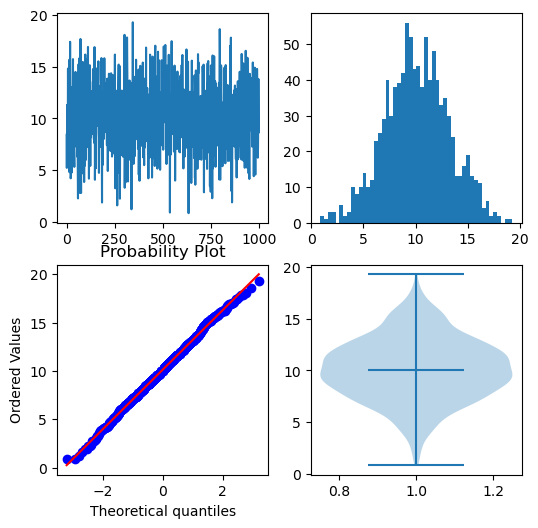

In [2]:
# parameters
stretch = 3 # variance (square of standard deviation)
shift   = 10 # mean
n       = 1000

# create data
data = stretch*np.random.randn(n) + shift

# plot
fig = plt.figure(figsize=[6,6])

plt.subplot2grid((2,2),(0,0))
plt.plot(data)

plt.subplot2grid((2,2),(0,1))
plt.hist(data,50)

plt.subplot2grid((2,2),(1,0))
stats.probplot(data, dist="norm", plot=plt)

plt.subplot2grid((2,2),(1,1))
plt.violinplot(data,showmedians=True)
plt.show()

## *UNI-FORM*

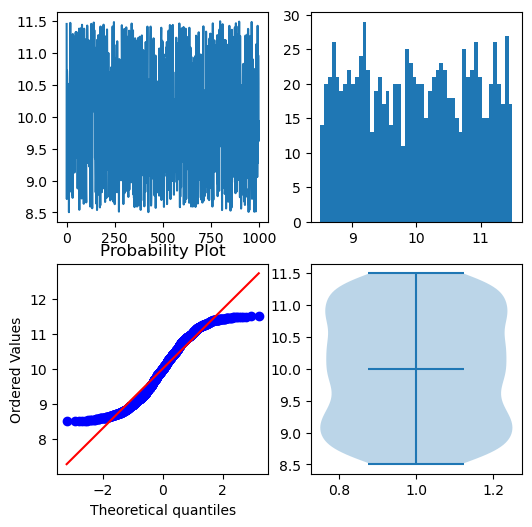

In [3]:
# parameters
stretch = 3 # variance (square of standard deviation)
shift   = 10 # mean
n       = 1000

# create data
data = stretch*np.random.rand(n) + shift-.5*stretch

# plot
fig = plt.figure(figsize=[6,6])

plt.subplot2grid((2,2),(0,0))
plt.plot(data)

plt.subplot2grid((2,2),(0,1))
plt.hist(data,50)

plt.subplot2grid((2,2),(1,0))
stats.probplot(data, dist="norm", plot=plt)

plt.subplot2grid((2,2),(1,1))
plt.violinplot(data,showmedians=True)
plt.show()

## *SHIFTING AND STRETCHING THE DISTRIBUTION*

* SHIFT - ADDITIVE PARAMETERS - AFFECTS MEAN OF DIST.

* STRETCH - MULTIPLICATIVE PARAMETER - AFFECTS STD AND VARIANCE OF DIST.

In [4]:
# parameters
stretch = 3 # variance (square of standard deviation)
shift   = 10 # mean

## *QQ PLOTS - quartile-quartile*

* QQ is used to compare SHAPE of theoretical dist. vs empirical (sample) dist.

* in another words if dist of data aligns with for example theoretical norm. dist.

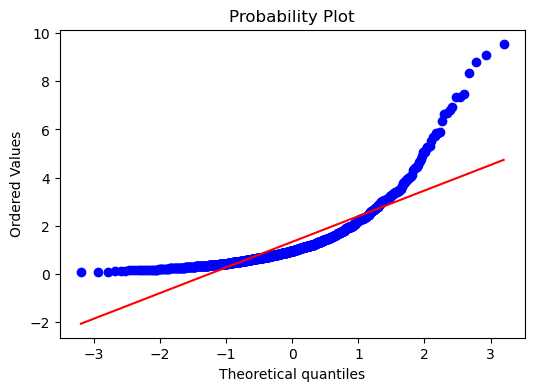

In [5]:
import scipy.stats as stats

n = 1000 #number of data points
d = np.exp(np.random.randn(n)*.8) # log normal dist.

fig = plt.figure(figsize=[6,4])
stats.probplot(d, dist='norm', plot=plt)
plt.show()

## *Poisson-distributed random noise*

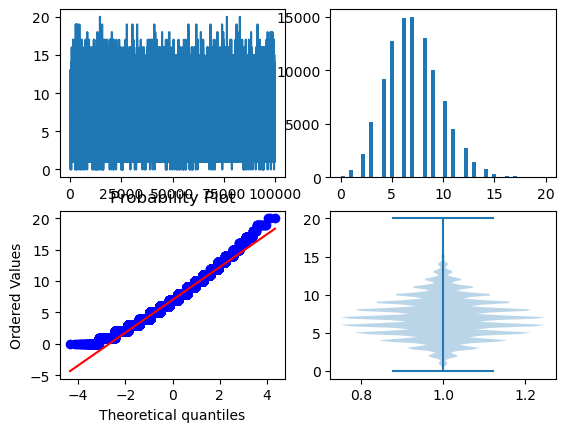

In [7]:
# number of points
n = 100000

# lambda parameter
l = 7

# initialize data
data = np.zeros(n)

# loop over points
for i in range(0,n):
    
    # reset values
    p = 1
    k = 1
    
    # randomly decrease p until it exceeds lambda (the threshold)
    while p>np.exp(-l):
        p = p*np.random.rand(1) # rand is [0,1] so p keeps getting smaller
        k = k+1
    
    # data point for this iteration
    data[i] = k-2
    

# plot
plt.subplot2grid((2,2),(0,0))
plt.plot(data)

plt.subplot2grid((2,2),(0,1))
plt.hist(data,50)

plt.subplot2grid((2,2),(1,0))
stats.probplot(data, dist="norm", plot=plt)

plt.subplot2grid((2,2),(1,1))
plt.violinplot(data)
plt.show()

## *Log-normal distributed random noise*

* normal dist + natural exponential function

* The exponential function is e^x where e is a mathematical constant called Euler's number, approximately 2.718281. This value has a close mathematical relationship with pi and the slope of the curve e^x is equal to its value at every point. np.exp() calculates e^x for each value of x in an input array.

165.31080309209295 4.9889243661941585


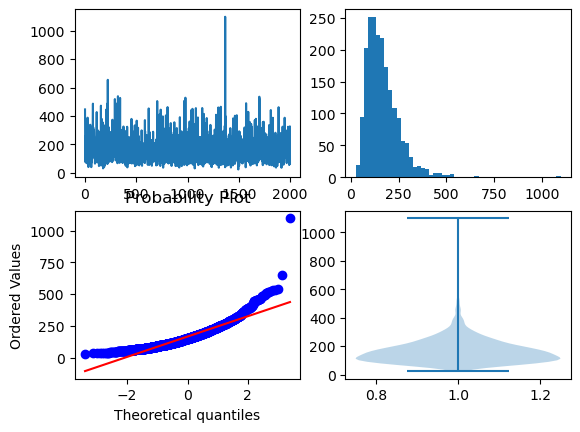

In [14]:
shift   = 5  # mean
stretch = .5 # standard deviation
n = 2000     # number of data points

# generate data
data = stretch*np.random.randn(n) + shift
data = np.exp( data )

print(np.mean(data),np.mean(np.log(data)))

# plot
plt.subplot2grid((2,2),(0,0))
plt.plot(data)

plt.subplot2grid((2,2),(0,1))
plt.hist(data,50)

plt.subplot2grid((2,2),(1,0))
stats.probplot(data, dist="norm", plot=plt)

plt.subplot2grid((2,2),(1,1))
plt.violinplot(data)
plt.show()

# *SIGNAL TO NOISE RATION - SNR*

#### *https://pysdr.org/content/noise.html*

In [26]:
# generate data

shift = 5 #mean
stretch = .05 #std
n = 2000

#log-normally dist. random data
data = np.exp( stretch*np.random.randn(n) + shift )

#descriptive stats
meanval1 = np.mean(data)
stdev = np.std(data)
variance = np.var(data)

# signal to noise ratio
SNR = meanval1 / stdev
SNR

1.878224489502554

## *FANO FACTOR*

In [27]:
# Fano Factor
fano = variance / meanval1
fano

0.360602481932135

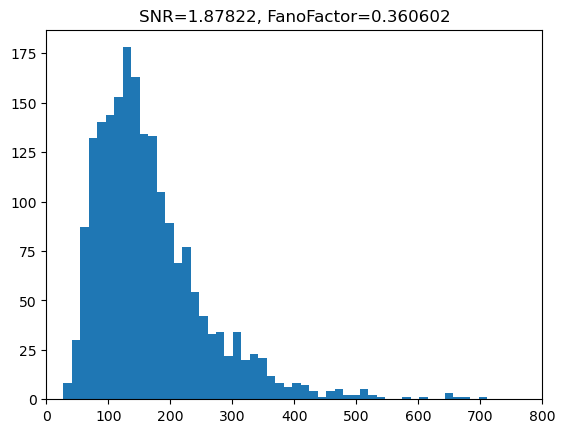

In [34]:
#plot
plt.hist(data,50)
plt.xlim([0,800])
plt.title('SNR=%g, FanoFactor=%g' %(SNR,fano))
plt.show()

## *Cohen's d - method for quantyfying the diffeence between two distributions*

* Cohen's d can be calculated as the difference between the means divided by the pooled Std Deviation:

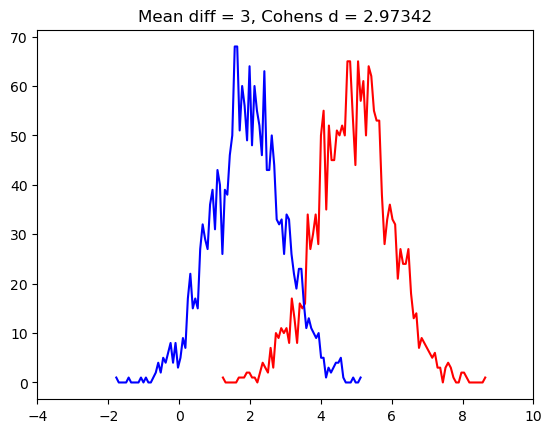

In [43]:

mean1   = 5  # mean of distribution 1
mean2   = 2  # mean of distribution 2
stretch = 1  # standard deviation (both distributions)

n = 2000  # sample points per distribution


# generate datasets
data1 = np.random.randn(n)*stretch + mean1
data2 = np.random.randn(n)*stretch + mean2

# compute empirical means
emean1 = np.mean(data1)
emean2 = np.mean(data2)

# get histograms for plotting
[y1,x1] = np.histogram(data1,100)
[y2,x2] = np.histogram(data2,100)

# Compute Cohen's D as measure of separability
cohenD = abs(emean1-emean2) / ( (np.std(data1)+np.std(data2))/2 )

# plot
plt.plot(x1[:-1],y1,'r')
plt.plot(x2[:-1],y2,'b')
plt.xlim([-4,10])
plt.title('Mean diff = %g, Cohen''s d = %g' %(abs(mean2-mean1),cohenD))
plt.show()